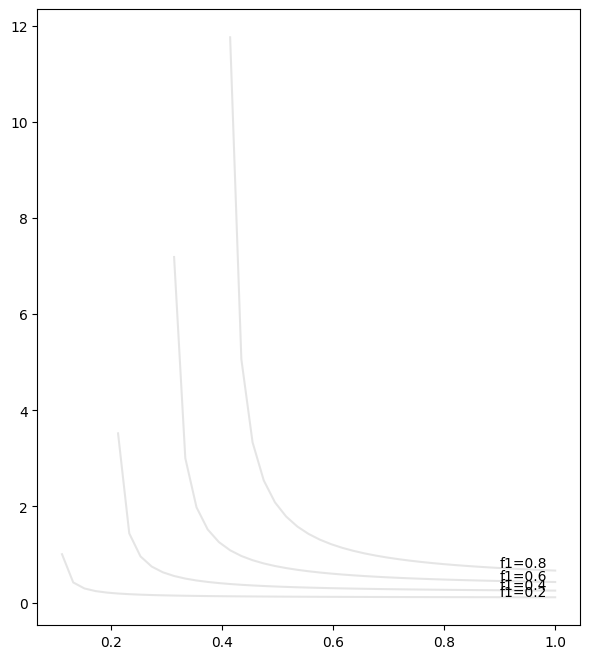

In [44]:
from itertools import cycle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree, ensemble, metrics
from sklearn.model_selection import train_test_split

colors = ["navy", "turquoise", "darkorange", "cornflowerblue"]

_, ax = plt.subplots(figsize=(7, 8))

df = pd.read_csv('bioresponse.csv')

X = df.drop('Activity', axis=1)
Y = df['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

Доля правильных ответов: 0.7433392539964476
Точность: 0.7587786259541984
Полнота: 0.173298875338511
Значение F1: 0.774746687451286
Логарифмическая потеря: 8.864860314851828


[Text(0.5, 0.875, 'X[26] <= 0.5\ngini = 0.497\nsamples = 2625\nvalue = [1219, 1406]'),
 Text(0.25, 0.625, 'X[77] <= 0.037\ngini = 0.411\nsamples = 1278\nvalue = [908, 370]'),
 Text(0.125, 0.375, 'X[1] <= 0.507\ngini = 0.344\nsamples = 1007\nvalue = [785, 222]'),
 Text(0.0625, 0.125, 'gini = 0.172\nsamples = 242\nvalue = [219, 23]'),
 Text(0.1875, 0.125, 'gini = 0.385\nsamples = 765\nvalue = [566, 199]'),
 Text(0.375, 0.375, 'X[910] <= 0.339\ngini = 0.496\nsamples = 271\nvalue = [123, 148]'),
 Text(0.3125, 0.125, 'gini = 0.403\nsamples = 161\nvalue = [45, 116]'),
 Text(0.4375, 0.125, 'gini = 0.413\nsamples = 110\nvalue = [78, 32]'),
 Text(0.75, 0.625, 'X[84] <= 0.038\ngini = 0.355\nsamples = 1347\nvalue = [311, 1036]'),
 Text(0.625, 0.375, 'X[201] <= 0.868\ngini = 0.325\nsamples = 1248\nvalue = [255, 993]'),
 Text(0.5625, 0.125, 'gini = 0.312\nsamples = 1209\nvalue = [234, 975]'),
 Text(0.6875, 0.125, 'gini = 0.497\nsamples = 39\nvalue = [21, 18]'),
 Text(0.875, 0.375, 'X[1062] <= 0.5\n

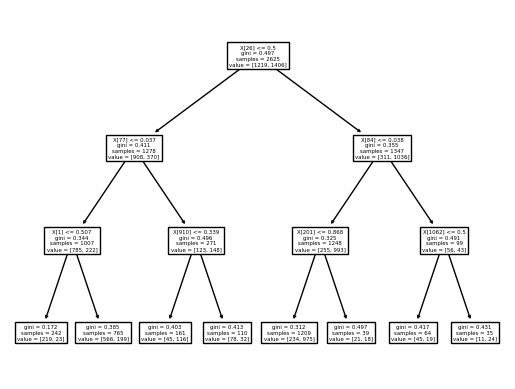

In [45]:

# мелкое дерево решений
clf_sm = tree.DecisionTreeClassifier(max_depth=3, random_state=17)
clf_sm.fit(X_train, y_train)
y_sm_pred = clf_sm.predict(X_test)

# рассчитываем метрики
print("Доля правильных ответов:", metrics.accuracy_score(y_test, y_sm_pred))
print("Точность:", metrics.precision_score(y_test, y_sm_pred))
print("Полнота:", metrics.completeness_score(y_test, y_sm_pred))
print("Значение F1:", metrics.f1_score(y_test, y_sm_pred))
print("Логарифмическая потеря:", metrics.log_loss(y_test, y_sm_pred))

# визуализация
tree.plot_tree(clf_sm)

Доля правильных ответов: 0.7522202486678508
Точность: 0.7656012176560122
Полнота: 0.18737547626537324
Значение F1: 0.7828793774319067
Логарифмическая потеря: 8.558118785243634


[Text(0.5883064516129032, 0.9545454545454546, 'X[26] <= 0.5\ngini = 0.497\nsamples = 2625\nvalue = [1219, 1406]'),
 Text(0.2879032258064516, 0.8636363636363636, 'X[77] <= 0.037\ngini = 0.411\nsamples = 1278\nvalue = [908, 370]'),
 Text(0.12379032258064517, 0.7727272727272727, 'X[1] <= 0.507\ngini = 0.344\nsamples = 1007\nvalue = [785, 222]'),
 Text(0.06774193548387097, 0.6818181818181818, 'X[937] <= 0.038\ngini = 0.172\nsamples = 242\nvalue = [219, 23]'),
 Text(0.05161290322580645, 0.5909090909090909, 'X[359] <= 0.062\ngini = 0.141\nsamples = 235\nvalue = [217, 18]'),
 Text(0.03870967741935484, 0.5, 'X[738] <= 0.159\ngini = 0.115\nsamples = 229\nvalue = [215, 14]'),
 Text(0.03225806451612903, 0.4090909090909091, 'X[177] <= 0.941\ngini = 0.1\nsamples = 227\nvalue = [215, 12]'),
 Text(0.025806451612903226, 0.3181818181818182, 'X[698] <= 0.05\ngini = 0.093\nsamples = 226\nvalue = [215, 11]'),
 Text(0.01935483870967742, 0.22727272727272727, 'X[222] <= 0.82\ngini = 0.085\nsamples = 225\nval

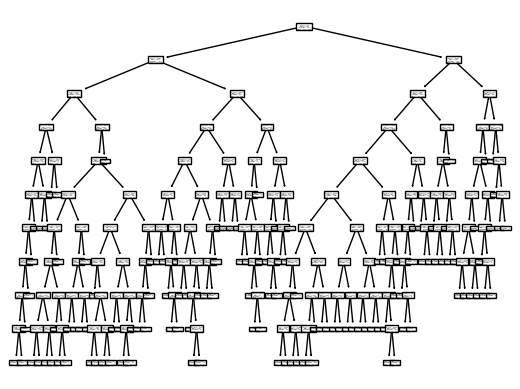

In [46]:
# глубокое дерево решений
clf_deep = tree.DecisionTreeClassifier(max_depth=10, random_state=17)
clf_deep.fit(X_train, y_train)
y_deep_pred = clf_deep.predict(X_test)

# рассчитываем метрики
print("Доля правильных ответов:", metrics.accuracy_score(y_test, y_deep_pred))
print("Точность:", metrics.precision_score(y_test, y_deep_pred))
print("Полнота:", metrics.completeness_score(y_test, y_deep_pred))
print("Значение F1:", metrics.f1_score(y_test, y_deep_pred))
print("Логарифмическая потеря:", metrics.log_loss(y_test, y_deep_pred))

# визуализация
tree.plot_tree(clf_deep)

Доля правильных ответов: 0.7335701598579041
Точность: 0.7586750788643533
Полнота: 0.15888084831848567
Значение F1: 0.7622820919175912
Логарифмическая потеря: 9.202269322273557


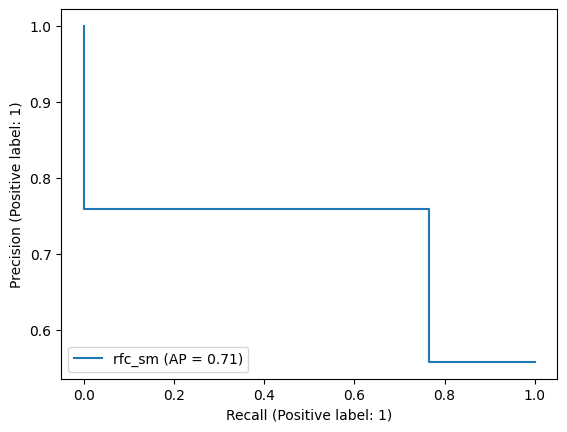

In [47]:

# случайный лес на мелких деревья
rfc_sm = ensemble.RandomForestClassifier(n_estimators=3, random_state=0)
rfc_sm.fit(X_train, y_train)
y_frc_sm_pred = rfc_sm.predict(X_test)

# рассчитываем метрики
print("Доля правильных ответов:",
      metrics.accuracy_score(y_test, y_frc_sm_pred))
print("Точность:", metrics.precision_score(y_test, y_frc_sm_pred))
print("Полнота:", metrics.completeness_score(y_test, y_frc_sm_pred))
print("Значение F1:", metrics.f1_score(y_test, y_frc_sm_pred))
print("Логарифмическая потеря:", metrics.log_loss(y_test, y_frc_sm_pred))


Доля правильных ответов: 0.7868561278863233
Точность: 0.8159609120521173
Полнота: 0.24874201183782374
Значение F1: 0.8067632850241546
Логарифмическая потеря: 7.3618087826715595


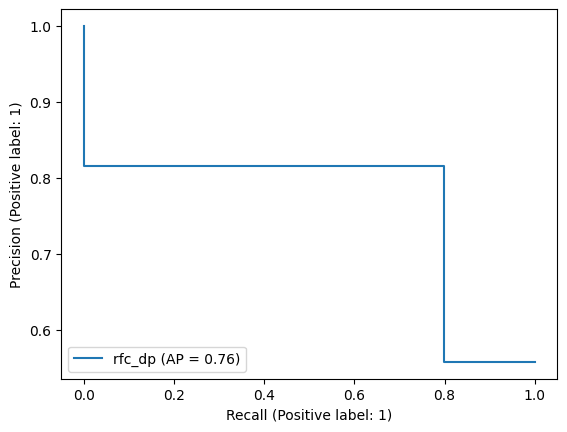

In [48]:
# случайный лес на глубоких деревья
rfc_dp = ensemble.RandomForestClassifier(n_estimators=20, random_state=0)
rfc_dp.fit(X_train, y_train)
y_frc_dp_pred = rfc_dp.predict(X_test)

# рассчитываем метрики
print("Доля правильных ответов:",
      metrics.accuracy_score(y_test, y_frc_dp_pred))
print("Точность:", metrics.precision_score(y_test, y_frc_dp_pred))
print("Полнота:", metrics.completeness_score(y_test, y_frc_dp_pred))
print("Значение F1:", metrics.f1_score(y_test, y_frc_dp_pred))
print("Логарифмическая потеря:", metrics.log_loss(y_test, y_frc_dp_pred))

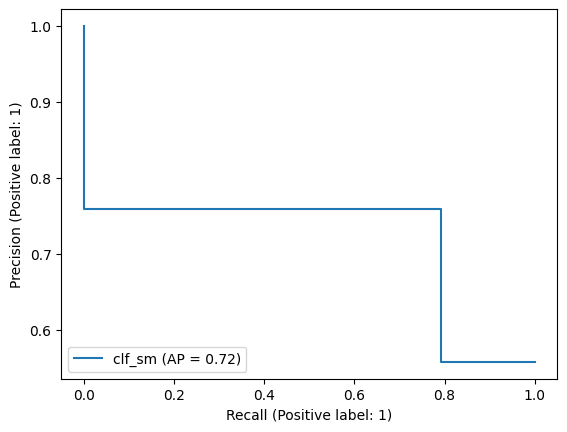

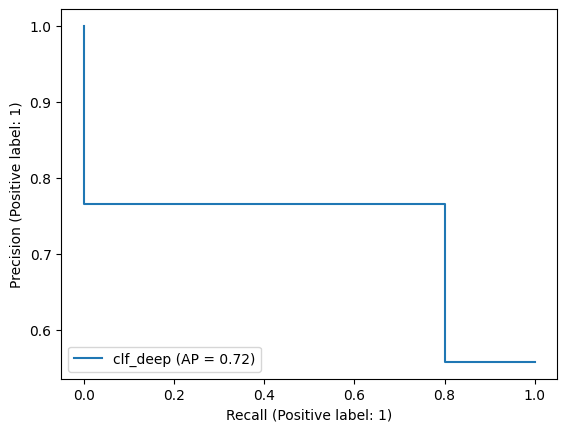

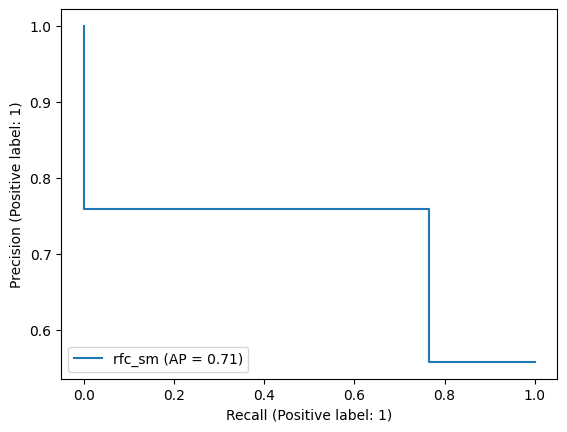

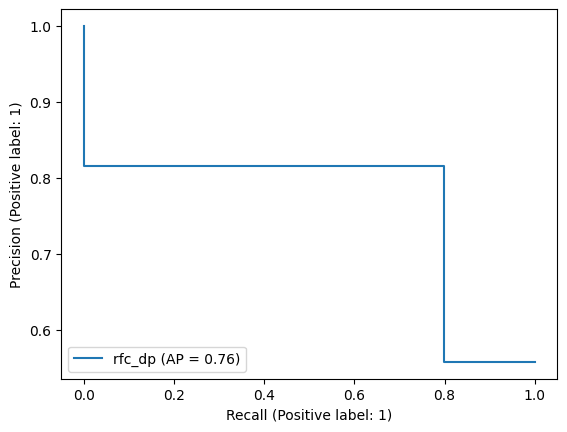

In [50]:
handles, labels = ax.get_legend_handles_labels()

display = metrics.PrecisionRecallDisplay.from_predictions(y_test, y_sm_pred, name="clf_sm")
display.plot(ax=ax, name="Мелкое дерево решений", color=colors[0])

display = metrics.PrecisionRecallDisplay.from_predictions(y_test, y_deep_pred, name="clf_deep")
display.plot(ax=ax, name="Глубокое дерево решений", color=colors[1])

display = metrics.PrecisionRecallDisplay.from_predictions(y_test, y_frc_sm_pred, name="rfc_sm")
display.plot(ax=ax, name="Случайный лес на мелких деревьях", color=colors[2])

display = metrics.PrecisionRecallDisplay.from_predictions(y_test, y_frc_dp_pred, name="rfc_dp")
display.plot(ax=ax, name="Случайный лес на глубоких деревьях", color=colors[3])

# построение кривых precision recall
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.legend(handles=handles, labels=labels, loc="best")
ax.set_title("Extension of Precision-Recall curve to multi-class")

plt.show()